In [1]:
import math
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


Brownian Motion

A Brownian motion is a stochastic process W(t) for t in [0,T].

Filtered probability space (Omega, F, P, F(t) for t in [0,T]) where F is filtration.

1. W(0) = 0

2. W has independent increments

3. W has Gaussian (normal) increments

4. W has continuous sample paths (almost surely).

 

1. Symmetric Random Walk

Picture you have successive coin tosses, \omega = \omega_1\omega_2\omega_3 ...

Where \omega_n is the outcome of the nth toss.

Let X(j) = 1 if outcome = H and -1 if outcome = T

If we define M(0) = 0, then we have a process M(k) = summation of X(j) from j=1 through until k.

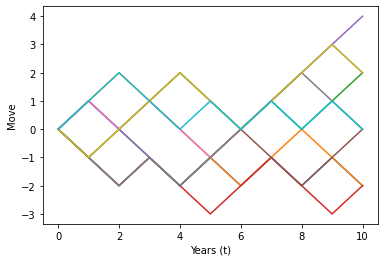

In [4]:
# Parameters
M = 10  # number of simulations
t = 10  # Time

random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M, t)).T
origin = np.zeros((1, M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()


Properties of a Symmetric Random Walk


Independent Increments

Martingale

Quadratic Varition


In [5]:
# Create Quadratic variation and Variance functions
def quadratic_variation(x): return round(np.square(x[:-1]-x[1:]).sum(), 3)


def variance(x): return round(np.var(x, axis=0), 3)


[quadratic_variation(path) for path in rw_paths.T[:4]]
[variance(path) for path in rw_paths[1:11]]


[1.0, 1.96, 1.0, 2.44, 1.44, 0.84, 0.96, 2.76, 3.84, 3.84]

Scaled Symmetric Random Walk

To approximate a Browian Motion we can speed up time and scale down the step size.

W(n,t) = 1/sqrt(n) * M(nt)

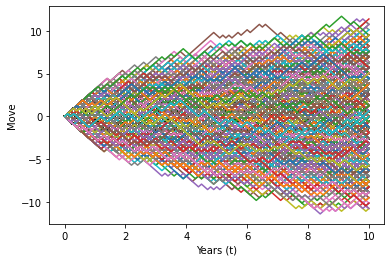

In [7]:
# Parameters
M = 10000  # number of simulations
t = 10  # Time
n = 10

random_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M, t*n)).T
origin = np.zeros((1, M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

time = np.linspace(0, t, t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T
# print(np.size(tt),np.size(srw_paths))
plt.plot(tt, srw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()


Limit of Binomial Distribution

As n increases, the binomial distribution converges to the normal distribution with variance t.

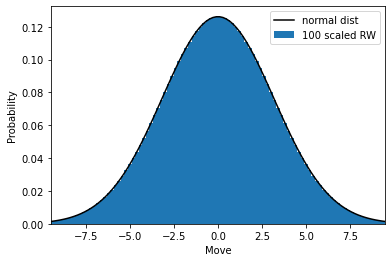

In [8]:
n = 100
t = 10

# Combinations


def nCr(n, k):
    f = math.factorial
    return f(n) / (f(k) * f(n-k))


perms = [nCr(n*t, k)*(0.5)**(n*t) for k in range(int(n*t)+1)]


def W_nt(n, t): return 1/np.sqrt(n) * np.arange(-n*t, n*t+1, 2)


outcomes = W_nt(n, t)
plt.bar(outcomes, [perm/(outcomes[1]-outcomes[0]) for perm in perms], outcomes[1]-outcomes[0],
        label='{0} scaled RW'.format(n))

x = np.linspace(-3*np.sqrt(t), 3*np.sqrt(t), 100)
plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(t)), 'k-', label='normal dist')

plt.xlim(-3*np.sqrt(t), 3*np.sqrt(t))
plt.ylabel("Probability")
plt.xlabel("Move")
plt.legend()
plt.show()
